In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as m

In [2]:
first = pd.read_csv("/Users/physica/Desktop/Archive/TheOnesThatReachedFirst1.csv")
reach = pd.read_csv("/Users/physica/Desktop/Archive/TheOnesThatReachedFromTheTotal1.csv")
allGen = pd.read_csv("/Users/physica/Desktop/Archive/TotalRandomGeneratedData1.csv")

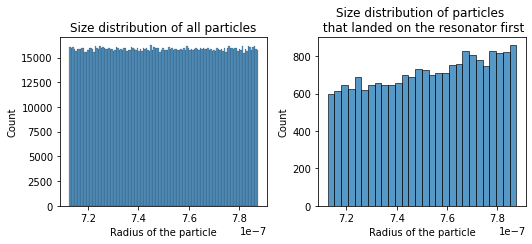

In [47]:

plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2)
axes[0].set_xlabel("Radius of the particle")
axes[1].set_xlabel("Radius of the particle")
axes[0].set_title("Size distribution of all particles")
axes[1].set_title("Size distribution of particles \n that landed on the resonator first")
sns.histplot(data = first, x = 'Rp_', ax=axes[1])
sns.histplot(data = allGen, x = 'Rp_', ax=axes[0])
plt.show()

In [48]:
first = first.sort_values("time")
first

,Unnamed: 0,rho,time,Rp_
4426,4426,39.106439,0.100100,7.422990e-07
1008,1008,39.106957,0.100100,7.514652e-07
16337,16337,39.105717,0.100100,7.202335e-07
13103,13103,39.106650,0.100100,7.327499e-07
13264,13264,39.106915,0.100100,7.691893e-07
...,...,...,...,...
17428,17428,39.101545,19.219219,7.759492e-07
10889,10889,39.105734,19.619620,7.512636e-07
6438,6438,39.105326,19.919920,7.682882e-07
11473,11473,39.104237,21.021021,7.712047e-07


<span>Statistics</span>

In [3]:
def norm(array):
    return (array-min(array))/(max(array)-min(array))

In [52]:
allGen_norm = norm(allGen.Rp_.to_numpy())


1.0

In [5]:
def nCr(n, r):
     
    return (fact(n) / (fact(r)
                * fact(n - r)))

def fact(n):
    if n == 0:
        return 1
    res = 1
     
    for i in range(2, n+1):
        res = res * i
         
    return res

In [106]:
def bates(array, n):
    sng = 0
    result = 0
    X = np.average(array)
    f = (n/fact(n-1))
    for k in range(n+1):
        if n*X < k:
            sng = -1
        if n*X == k:
            sng = 0
        if n*X > k:
            sng = 1
        result += ((-1)**k * nCr(n, k) * (n*X - k)**(n-1) * sng)
    return [X,result*f]
    

In [118]:
a = []
low = 0
high = 100
for i in range(int(len(allGen)/100)):
    array = allGen_norm[low:high]
    a.append(bates(array,100))
    low += 100
    high += 100


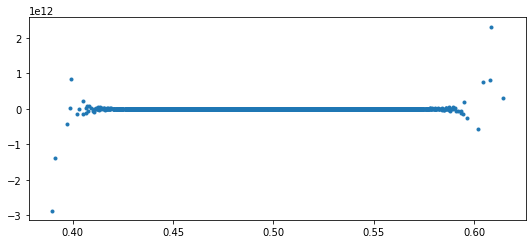

In [119]:
a = np.matrix(a)
plt.plot(a[:,0], a[:,1], ".")